In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg_train = ImageDataGenerator(rescale=1./255,
                         #rotation_range=10,
                         #width_shift_range=.15,
                         #height_shift_range=.15,
                         horizontal_flip=True
                         #zoom_range=[0,0.1]
                         )
idg_validation_test = ImageDataGenerator(rescale=1./255)
path ='dataset/'
batch_size = 32
img_size = (250,250)

train_dir = path + 'train'
train_images = idg_train.flow_from_directory(batch_size=batch_size,
                                             directory=train_dir,
                                             #color_mode = 'grayscale'
                                             target_size = img_size,
                                             class_mode='categorical')

validation_dir = path + 'validation'
val_images = idg_validation_test.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     #color_mode = 'grayscale',
                                                     target_size= img_size,
                                                     class_mode='categorical')

batch_size = 1
test_dir = path + 'test'
test_images = idg_validation_test.flow_from_directory(batch_size=batch_size,
                                                      directory=test_dir,
                                                      #color_mode = 'grayscale'
                                                      target_size= img_size,
                                                      class_mode='categorical')

Found 5326 images belonging to 3 classes.
Found 666 images belonging to 3 classes.
Found 664 images belonging to 3 classes.


In [15]:
model2 = Sequential()
model2.add(layers.Conv2D(64, (7,7), activation='relu', input_shape=(250, 250 ,3)))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(32, (7,7), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(32, (7,7), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(32, (7,7), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(32, (7,7), activation='relu'))
model2.add(layers.Flatten())

model2.add(layers.Dense(32, activation= 'relu'))
model2.add(layers.Dense(8, activation= 'relu'))
model2.add(layers.Dense(3, activation= 'softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 244, 244, 64)      9472      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 122, 122, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 116, 116, 32)      100384    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 58, 58, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 32)        50208     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 20, 20, 32)       

Epoch 1/35
167/167 [==============================] - 596s 4s/step - loss: 1.0418 - accuracy: 0.4694 - val_loss: 0.9414 - val_accuracy: 0.5300
Epoch 2/35
167/167 [==============================] - 617s 4s/step - loss: 0.9365 - accuracy: 0.5340 - val_loss: 1.0109 - val_accuracy: 0.5105
Epoch 3/35
167/167 [==============================] - 598s 4s/step - loss: 0.8698 - accuracy: 0.5896 - val_loss: 0.7245 - val_accuracy: 0.7237
Epoch 4/35
167/167 [==============================] - 578s 3s/step - loss: 0.7212 - accuracy: 0.6846 - val_loss: 0.7643 - val_accuracy: 0.7027
Epoch 5/35
167/167 [==============================] - 709s 4s/step - loss: 0.6087 - accuracy: 0.7430 - val_loss: 0.5939 - val_accuracy: 0.7553
Epoch 6/35
167/167 [==============================] - 722s 4s/step - loss: 0.5593 - accuracy: 0.7792 - val_loss: 0.6142 - val_accuracy: 0.7387
Epoch 7/35
167/167 [==============================] - 732s 4s/step - loss: 0.5157 - accuracy: 0.7908 - val_loss: 0.5507 - val_accuracy: 0.7808

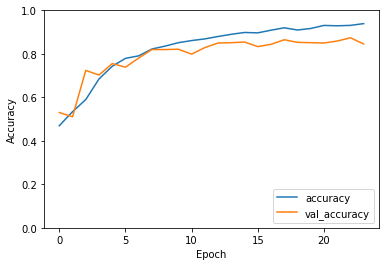

In [16]:
model2.compile(optimizer="adam",loss= CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
es =  EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 8, restore_best_weights = True)
history = model2.fit(train_images, epochs=35,validation_data = val_images ,use_multiprocessing = True, callbacks = [es] )
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [19]:
model2.evaluate(test_images)

664/664 [==============================] - 10s 15ms/step - loss: 0.3812 - accuracy: 0.8855


[0.3811708092689514, 0.8855421543121338]

In [20]:
model2.save('model-files/')

INFO:tensorflow:Assets written to: model-files/assets
